# Business understanding 
## Real world problem: How to increase property value for homeowners? 
### Who are the stakeholders? Homeowners 

#### This notebook should show how to increase proeprty value, by adding bathrooms and increasing the square foot living space.

In [1]:
# import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os  
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Construct the absolute file path to your dataset
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "housepj", "kc_house_data.csv")

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path)

# Review first 5 data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>King County Housing Data Description</title>
</head>
<body>

<h1>Data Description for King County Housing Dataset</h1>

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>Unique identifier for a house</td>
    </tr>
    <tr>
        <td>date</td>
        <td>Date the house was sold</td>
    </tr>
    <tr>
        <td>price</td>
        <td>Sale price (prediction target)</td>
    </tr>
    <tr>
        <td>bedrooms</td>
        <td>Number of bedrooms</td>
    </tr>
    <tr>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>sqft_living</td>
        <td>Square footage of living space in the home</td>
    </tr>
    <tr>
        <td>sqft_lot</td>
        <td>Square footage of the lot</td>
    </tr>
    <tr>
        <td>floors</td>
        <td>Number of floors (levels) in the house</td>
    </tr>
    <tr>
        <td>waterfront</td>
        <td>Whether the house is on a waterfront</td>
    </tr>
    <tr>
        <td>greenbelt</td>
        <td>Whether the house is adjacent to a green belt</td>
    </tr>
    <tr>
        <td>nuisance</td>
        <td>Whether the house has traffic noise or other recorded nuisances</td>
    </tr>
    <tr>
        <td>view</td>
        <td>Quality of view from the house</td>
    </tr>
    <tr>
        <td>condition</td>
        <td>Overall condition of the house (related to maintenance)</td>
    </tr>
    <tr>
        <td>grade</td>
        <td>Overall grade of the house (related to construction and design)</td>
    </tr>
    <tr>
        <td>heat_source</td>
        <td>Heat source for the house</td>
    </tr>
    <tr>
        <td>sewer_system</td>
        <td>Sewer system for the house</td>
    </tr>
    <tr>
        <td>sqft_above</td>
        <td>Square footage of the house apart from the basement</td>
    </tr>
    <tr>
        <td>sqft_basement</td>
        <td>Square footage of the basement</td>
    </tr>
    <tr>
        <td>sqft_garage</td>
        <td>Square footage of garage space</td>
    </tr>
    <tr>
        <td>sqft_patio</td>
        <td>Square footage of outdoor porch or deck space</td>
    </tr>
    <tr>
        <td>yr_built</td>
        <td>Year when the house was built</td>
    </tr>
    <tr>
        <td>yr_renovated</td>
        <td>Year when the house was renovated</td>
    </tr>
    <tr>
        <td>address</td>
        <td>Street address</td>
    </tr>
</table>

</body>
</html>




In [3]:
#descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
#display all columns 
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Cleaning the data

## In order to properly interpert the data, removal of missing data and duplicates is needed.


In [5]:
# 1. Handling Missing Values
df_cleaned = df.dropna()  # Drop rows with missing values
# 2. Handling Duplicates
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows

In [6]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

# Removal of uncessary columns 
## In this situation it was important to remove certain variables to better interpret the data. Some reasons for removing these columns included the lack of control the homewoner has on the variable. For instance the homeowner cannot change the address, latitude, logntude, or the year built, ect.

In [7]:
# List of columns to remove
columns_to_remove = ['address', 'sqft_lot', 'waterfront','greenbelt','sewer_system','grade','lat', 'long','date', 'nuisance','view', 'sqft_above', 'sqft_basement', 'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())

           id     price  bedrooms  bathrooms  sqft_living  floors condition  \
0  7399300360  675000.0         4        1.0         1180     1.0      Good   
1  8910500230  920000.0         5        2.5         2770     1.0   Average   
2  1180000275  311000.0         6        2.0         2880     1.0   Average   
3  1604601802  775000.0         3        3.0         2160     2.0   Average   
4  8562780790  592500.0         2        2.0         1120     2.0   Average   

   heat_source  
0          Gas  
1          Oil  
2          Gas  
3          Gas  
4  Electricity  


# Search for outliers 

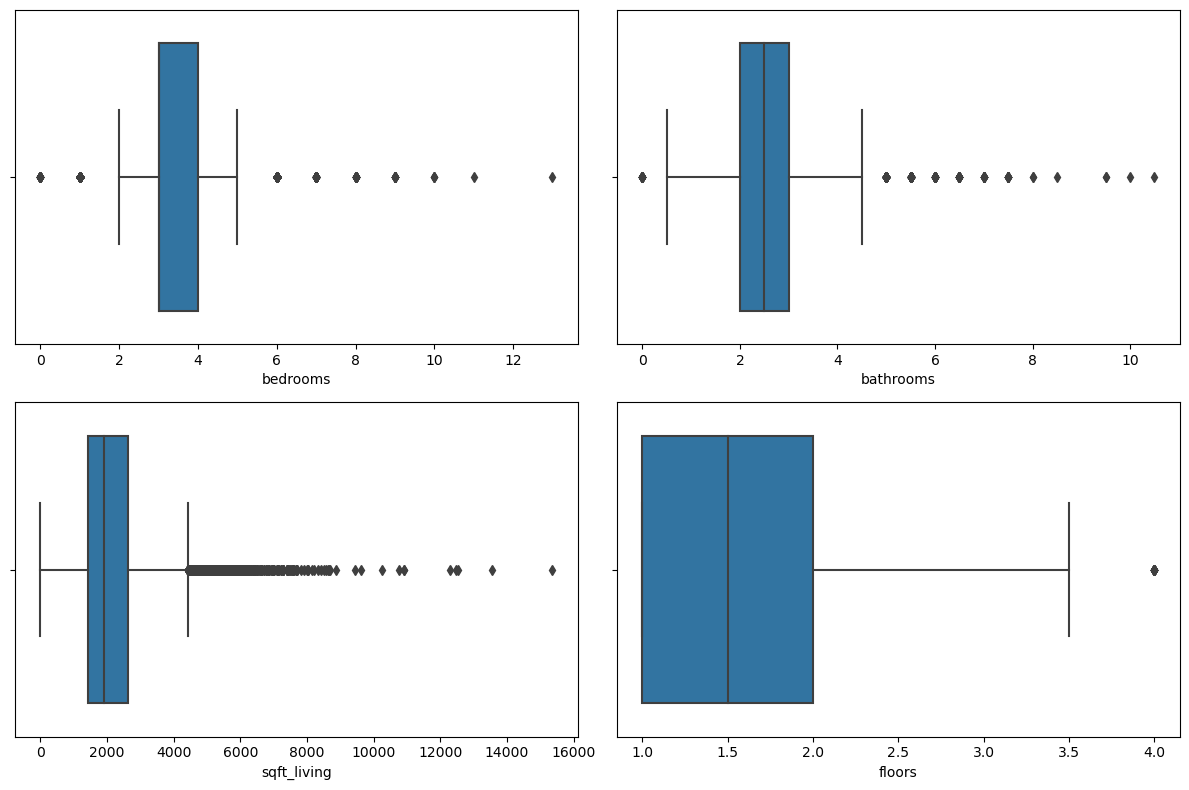

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_cleaned is your cleaned DataFrame
variables_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create individual box plots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=variable, data=df_cleaned)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


In [9]:

# Display the bottom 10 values for sqft_living
bottom_10_sqft_living = df_cleaned.sort_values(by='sqft_living').head(10)
print(bottom_10_sqft_living[['sqft_living']])


       sqft_living
14977            3
8694           260
8391           290
23622          290
5811           290
11989          310
476            320
13015          320
11420          320
29356          340


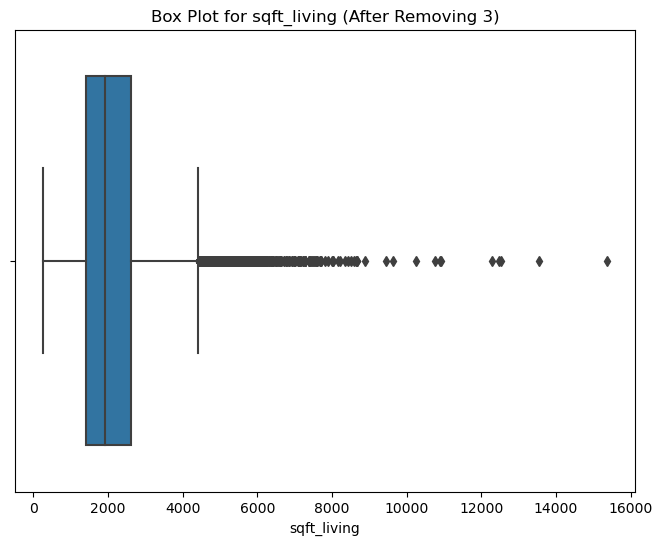

In [10]:

# Remove the specified value (3) for sqft_living
df_cleaned_filtered_sqft = df_cleaned[df_cleaned['sqft_living'] != 3]

# Create a new box plot for sqft_living after removal
plt.figure(figsize=(8, 6))
sns.boxplot(x='sqft_living', data=df_cleaned_filtered_sqft)
plt.title('Box Plot for sqft_living (After Removing 3)')
plt.show()


In [11]:
# Removal of extreme outliers

# Filter out houses with less than 1 bedroom and more than 5 bedrooms
df_cleaned = df_cleaned[(df_cleaned['bedrooms'] >= 1) & (df_cleaned['bedrooms'] <= 5)]

# Filter out houses with less than 1 bathroom and more than 5 bathrooms
df_cleaned = df_cleaned[(df_cleaned['bathrooms'] >= 1) & (df_cleaned['bathrooms'] <= 5)]

# Filter out houses with sqft_living outside the specified range (200 to 4200)
df_cleaned = df_cleaned[(df_cleaned['sqft_living'] >= 500) & (df_cleaned['sqft_living'] <= 4200)]

# Filter out houses with less than 1 floor and more than 3.5 floors
df_cleaned = df_cleaned[(df_cleaned['floors'] >= 1) & (df_cleaned['floors'] <= 3.5)]




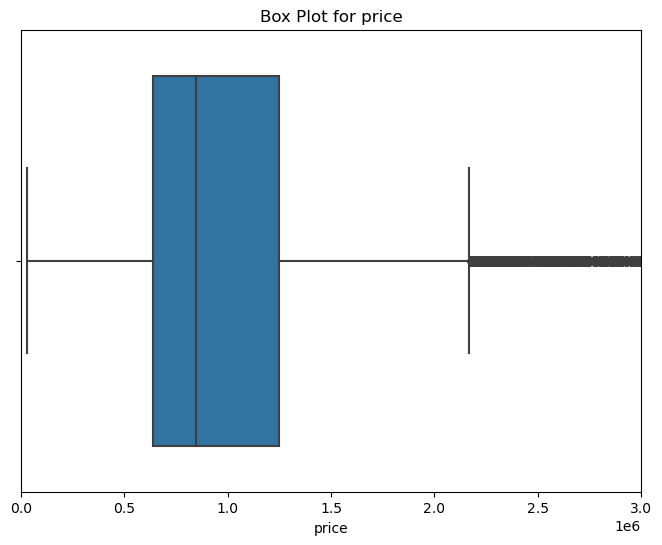

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'price' is the variable of interest and df_cleaned is your cleaned DataFrame
price_variable = 'price'

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a box plot for 'price' with a custom x-axis range
sns.boxplot(x=price_variable, data=df_cleaned)

# Set custom x-axis range
plt.xlim(0, 3000000)  # Adjust the range as needed

# Show the plot
plt.title(f'Box Plot for {price_variable}')
plt.xlabel(price_variable)
plt.show()



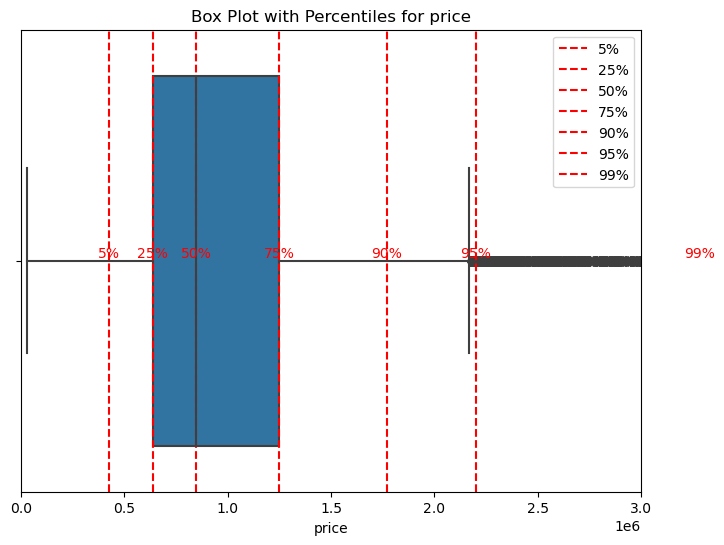

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


price_variable = 'price'

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a box plot for 'price' with a custom x-axis range
sns.boxplot(x=price_variable, data=df_cleaned)

# Set custom x-axis range
plt.xlim(0, 3000000)  # Adjust the range as needed

# Calculate percentiles
percentiles = [5, 25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(df_cleaned[price_variable], percentiles)

# Add lines or annotations for percentiles
for percentile, value in zip(percentiles, percentile_values):
    plt.axvline(x=value, color='red', linestyle='--', label=f'{percentile}%')
    plt.text(value, 0, f'{percentile}%', color='red', va='bottom', ha='center')

# Show the plot
plt.title(f'Box Plot with Percentiles for {price_variable}')
plt.xlabel(price_variable)
plt.legend()
plt.show()


In [14]:
# Assuming 'price' is the variable of interest and df_cleaned is your cleaned DataFrame
price_variable = 'price'

# Calculate percentiles
percentiles = [5, 90]
percentile_values = np.percentile(df_cleaned[price_variable], percentiles)

# Filter DataFrame to exclude outliers
df_cleaned = df_cleaned[(df_cleaned[price_variable] >= percentile_values[0]) & (df_cleaned[price_variable] <= percentile_values[1])]

# Display the filtered DataFrame without outliers
print(df_cleaned)


               id      price  bedrooms  bathrooms  sqft_living  floors  \
0      7399300360   675000.0         4        1.0         1180     1.0   
1      8910500230   920000.0         5        2.5         2770     1.0   
3      1604601802   775000.0         3        3.0         2160     2.0   
4      8562780790   592500.0         2        2.0         1120     2.0   
5      2807100156   625000.0         2        1.0         1190     1.0   
...           ...        ...       ...        ...          ...     ...   
30150  7834800180  1555000.0         5        2.0         1910     1.5   
30151   194000695  1313000.0         3        2.0         2020     2.0   
30152  7960100080   800000.0         3        2.0         1620     1.0   
30153  2781280080   775000.0         3        2.5         2570     2.0   
30154  9557800100   500000.0         3        1.5         1200     1.0   

      condition  heat_source  
0          Good          Gas  
1       Average          Oil  
3       Average   

In [15]:
#descriptive statistics
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,floors
count,2.423600e+04,2.423600e+04,24236.000000,24236.000000,24236.000000,24236.000000
mean,4.586511e+09,8.991544e+05,3.290188,2.206036,1910.999464,1.518382
std,2.876087e+09,3.271082e+05,0.835614,0.719211,691.887260,0.567083
min,1.000094e+06,4.250000e+05,1.000000,1.000000,500.000000,1.000000
25%,2.138775e+09,6.500000e+05,3.000000,2.000000,1385.000000,1.000000
50%,3.902300e+09,8.200000e+05,3.000000,2.500000,1820.000000,1.500000
75%,7.300250e+09,1.100000e+06,4.000000,2.500000,2350.000000,2.000000
max,9.904000e+09,1.770000e+06,5.000000,5.000000,4200.000000,3.500000


# Making Categorical Data Interpretable 
## It is necessary to create dumie variables inorder to interpreate the results of catagorical data and its impacts on price.

In [16]:
#  Encoding Categorical Variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['condition', 'heat_source'])

In [17]:
#checking to see if dummie variables were encoded for categorical Variables
# 3. Encoding Categorical Variables
print(df_cleaned)

               id      price  bedrooms  bathrooms  sqft_living  floors  \
0      7399300360   675000.0         4        1.0         1180     1.0   
1      8910500230   920000.0         5        2.5         2770     1.0   
3      1604601802   775000.0         3        3.0         2160     2.0   
4      8562780790   592500.0         2        2.0         1120     2.0   
5      2807100156   625000.0         2        1.0         1190     1.0   
...           ...        ...       ...        ...          ...     ...   
30150  7834800180  1555000.0         5        2.0         1910     1.5   
30151   194000695  1313000.0         3        2.0         2020     2.0   
30152  7960100080   800000.0         3        2.0         1620     1.0   
30153  2781280080   775000.0         3        2.5         2570     2.0   
30154  9557800100   500000.0         3        1.5         1200     1.0   

       condition_Average  condition_Fair  condition_Good  condition_Poor  \
0                      0           

In [18]:
# Display the column names in your DataFrame
print(df_cleaned.columns)


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very Good', 'heat_source_Electricity',
       'heat_source_Electricity/Solar', 'heat_source_Gas',
       'heat_source_Gas/Solar', 'heat_source_Oil', 'heat_source_Oil/Solar',
       'heat_source_Other'],
      dtype='object')


# Using StatsModels for Multiple Linear Regression

In [19]:
# Price is the target variable
target_variable = 'price'

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     537.5
Date:                Mon, 15 Jan 2024   Prob (F-statistic):               0.00
Time:                        21:03:32   Log-Likelihood:            -3.3866e+05
No. Observations:               24236   AIC:                         6.773e+05
Df Residuals:                   24220   BIC:                         6.775e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [20]:
# view model coefficients
model.params


const                            3.832652e+05
id                              -4.128419e-07
bedrooms                        -3.556874e+04
bathrooms                        3.116304e+04
sqft_living                      2.308116e+02
floors                           2.250376e+04
condition_Average                5.544846e+04
condition_Fair                   4.128916e+04
condition_Good                   9.448727e+04
condition_Poor                   5.695220e+04
condition_Very Good              1.350881e+05
heat_source_Electricity         -1.239755e+04
heat_source_Electricity/Solar    7.653068e+03
heat_source_Gas                  1.836558e+04
heat_source_Gas/Solar            1.944087e+05
heat_source_Oil                  5.920977e+04
heat_source_Oil/Solar            4.086107e+04
heat_source_Other                7.516463e+04
dtype: float64

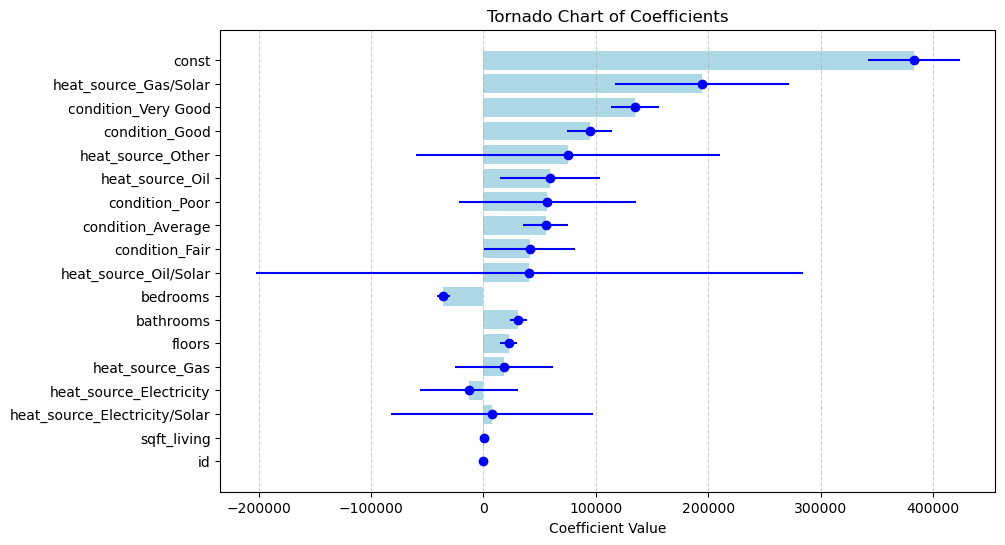

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the coefficients and their standard errors from the regression summary
coefficients = model.params
standard_errors = model.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# Working with only statistically insignificant data
## Data with p values <.05

In [21]:
# Filter coefficients based on p-values
significant_vars = model.params[model.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars)


const                    383265.231407
bedrooms                 -35568.741575
bathrooms                 31163.043165
sqft_living                 230.811592
floors                    22503.760949
condition_Average         55448.462842
condition_Fair            41289.157740
condition_Good            94487.273910
condition_Very Good      135088.137394
heat_source_Gas/Solar    194408.662649
heat_source_Oil           59209.765297
dtype: float64


In [22]:
import statsmodels.api as sm

# Assuming you have already defined df_cleaned and target_variable

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Access R-squared and adjusted R-squared values
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

# Print the values
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")



R-squared: 0.24975041172896184
Adjusted R-squared: 0.24928576499799293


In [23]:
import statsmodels.api as sm

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Access R-squared value
r_squared = model.rsquared

# Access adjusted R-squared
adjusted_r_squared = model.rsquared_adj

# Access F-statistic value
f_statistic = model.fvalue

# Access p-value associated with the F-statistic
f_p_value = model.f_pvalue

# Print the results
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"F-statistic: {f_statistic}")
print(f"P-value associated with F-statistic: {f_p_value}")


R-squared: 0.24975041172896184
Adjusted R-squared: 0.24928576499799293
F-statistic: 537.5060128114934
P-value associated with F-statistic: 0.0


In [24]:
import statsmodels.api as sm

# Assuming you have already defined df_cleaned and target_variable

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Access standard errors for coefficients
standard_errors = model.bse

# Create a DataFrame to display variable names and their standard errors
coefficients_summary = pd.DataFrame({'Variable': predictors_int.columns, 'Standard Error': standard_errors})

# Print the summary
print("Standard Errors for Coefficients:")
print(coefficients_summary)


Standard Errors for Coefficients:
                                                    Variable  Standard Error
const                                                  const    2.079950e+04
id                                                        id    6.357339e-07
bedrooms                                            bedrooms    2.912939e+03
bathrooms                                          bathrooms    3.764567e+03
sqft_living                                      sqft_living    4.111962e+00
floors                                                floors    3.777661e+03
condition_Average                          condition_Average    1.021579e+04
condition_Fair                                condition_Fair    2.062376e+04
condition_Good                                condition_Good    1.028819e+04
condition_Poor                                condition_Poor    4.016943e+04
condition_Very Good                      condition_Very Good    1.087855e+04
heat_source_Electricity              heat_